# Домашняя работа №5

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv('indian_liver_patient.csv') # Не хочу ставить сертификат, поэтому загружаю с диска
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

Пустых значений в Direct_Bilirubin:	0
Пустых значений в Total_Bilirubin:	0

Коэффициент корреляции Пирсона: 0.87

Ошибка (функция потерь; квадратичное значение):	0.768
Ошибка (функция потерь; абсолютное значение):	0.39


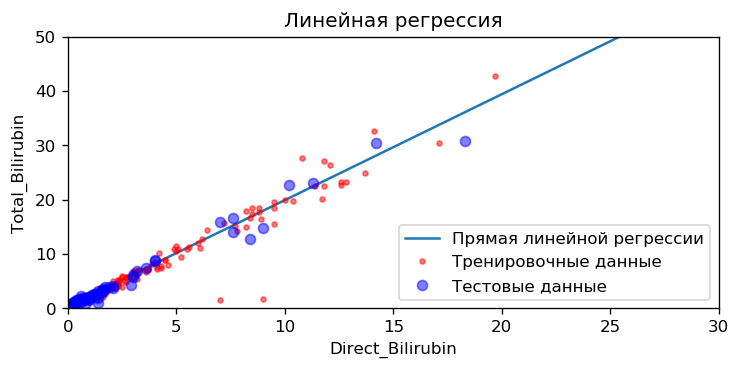

In [5]:
print(f'Пустых значений в Direct_Bilirubin:\t{data.Direct_Bilirubin.isnull().sum()}\nПустых значений в Total_Bilirubin:\t{data.Total_Bilirubin.isnull().sum()}\n')

corr, p_value = pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])
print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}\n')

direct_bilirubin = np.array(data['Direct_Bilirubin']).reshape(-1,1)
total_bilirubin = np.array(data['Total_Bilirubin']).reshape(-1,1)

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    direct_bilirubin,
    total_bilirubin,
    test_size = 0.2
)

model.fit(X_train, y_train)

predicted_y = model.predict(X_test)

print(f'Ошибка (функция потерь; квадратичное значение):\t{round(mean_squared_error(predicted_y, y_test),3)}')
print(f'Ошибка (функция потерь; абсолютное значение):\t{round(mean_absolute_error(predicted_y, y_test),3)}')

plt.figure(figsize=(7,3), dpi= 120)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(0, 50, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.', alpha=.5)
plt.plot(X_test, y_test, 'bo', alpha=.5)
plt.xlim(0,30)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [6]:
age = data['Age']

In [7]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [8]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [9]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех **колонок**. 

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

Размер выборки для возраста до 50 лет:	353
Показатель Direct_Bilirubin:
– среднее значение выборки:	1.495
– 50% квартиль:	0.3



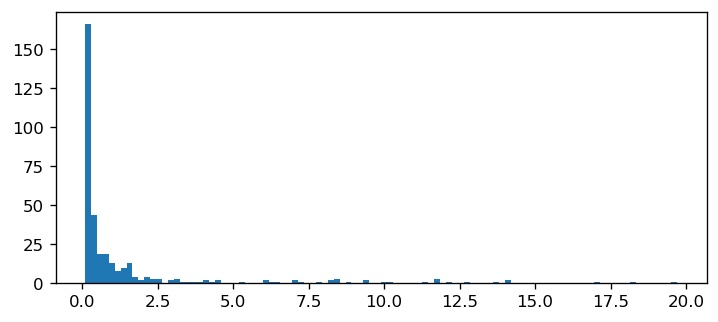

Размер выборки для возраста от 50 лет:	230
Показатель Direct_Bilirubin:
– среднее значение выборки:	1.473
– 50% квартиль:	0.4



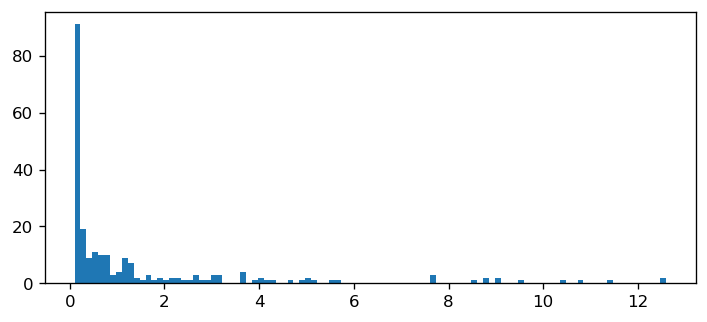

In [10]:
age_before_50 = data[data['Age'] < 50]
age_after_50 = data[data['Age'] >= 50]

print(f'Размер выборки для возраста до 50 лет:\t{len(age_before_50)}')
print('Показатель Direct_Bilirubin:')
print(f'– среднее значение выборки:\t{round(age_before_50.Direct_Bilirubin.mean(), 3)}')
print(f'– 50% квартиль:\t{age_before_50.Direct_Bilirubin.quantile(0.5)}\n')

plt.figure(figsize=(7,3), dpi= 120)
plt.hist(age_before_50.Direct_Bilirubin, 100)
# plt.xlim(0,3)
# plt.ylim(0,50)
plt.show()

print(f'Размер выборки для возраста от 50 лет:\t{len(age_after_50)}')
print('Показатель Direct_Bilirubin:')
print(f'– среднее значение выборки:\t{round(age_after_50.Direct_Bilirubin.mean(), 3)}')
print(f'– 50% квартиль:\t{age_after_50.Direct_Bilirubin.quantile(0.5)}\n')

plt.figure(figsize=(7,3), dpi= 120)
plt.hist(age_after_50.Direct_Bilirubin, 100)
# plt.xlim(0,3)
# plt.ylim(0,50)
plt.show()

#### Ответ:
Для выборки до 50 лет вероятны более высокие значения показателя Direct_Bilirubin.

===========

Посчитать критерий одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей.

Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)?

Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента.

alpha = 0.05, доверительная вероятность 95%.

Число степеней свободы = (количество людей больных  - 1).

Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [11]:
patient_disease = data[data['Dataset']==1]['Total_Bilirubin']
print(f'Среднее значение выборки:\t\t{round(patient_disease.mean(),4)}')
print(f'Общие количество больных:\t\t{len(patient_disease)}\nЧисло степеней свободы:\t\t\t{len(patient_disease)-1}')
print('Доверительная вероятность равна:\t95%')

statistic, pvalue = stats.ttest_1samp(patient_disease, data['Total_Bilirubin'].mean())
print(f't-критерий равен:\t\t\t{round(statistic,4)}\nЗначение p равно:\t\t\t{round(pvalue,4)}')

Среднее значение выборки:		4.1644
Общие количество больных:		416
Число степеней свободы:			415
Доверительная вероятность равна:	95%
t-критерий равен:			2.4711
Значение p равно:			0.0139


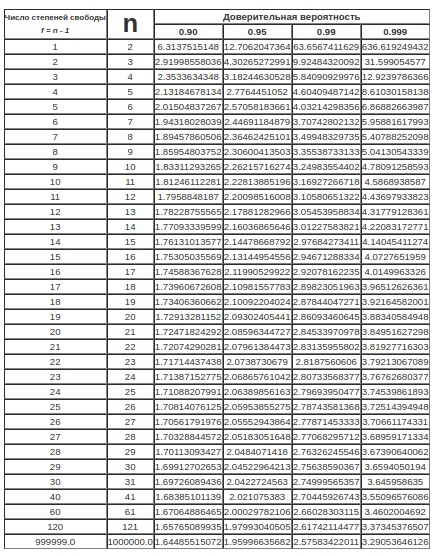

In [12]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

#### Ответ:
Наше значение t-критерий равно 2.47, т.е. привышает табличное значение (1.959... – 1.979...), значит мы отвергаем нулевую гипотизу, что наша выборка схожа с генеральной.

===========

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [13]:
print('Выборка больных')
patient_disease = data[data['Dataset']==1]['Total_Bilirubin']
print(f'Среднее значение выборки:\t\t{round(patient_disease.mean(),4)}')
print(f'Общие количество больных:\t\t{len(patient_disease)}\nЧисло степеней свободы:\t\t\t{len(patient_disease)-1}')
print('Доверительная вероятность равна:\t95%')

statistic, pvalue = stats.ttest_1samp(patient_disease, data['Total_Bilirubin'].mean())
print(f't-критерий равен:\t\t\t{round(statistic,4)}\nЗначение p равно:\t\t\t{round(pvalue,4)}')


print('\n\nВыборка здоровых')
patient_nodisease = data[data['Dataset']==2]['Total_Bilirubin']
print(f'Среднее значение выборки:\t\t{round(patient_nodisease.mean(),4)}')
print(f'Общие количество больных:\t\t{len(patient_nodisease)}\nЧисло степеней свободы:\t\t\t{len(patient_nodisease)-1}')
print('Доверительная вероятность равна:\t95%')

statistic, pvalue = stats.ttest_1samp(patient_nodisease, data['Total_Bilirubin'].mean())
print(f't-критерий равен:\t\t\t{round(statistic,4)}\nЗначение p равно:\t\t\t{round(pvalue,4)}')

Выборка больных
Среднее значение выборки:		4.1644
Общие количество больных:		416
Число степеней свободы:			415
Доверительная вероятность равна:	95%
t-критерий равен:			2.4711
Значение p равно:			0.0139


Выборка здоровых
Среднее значение выборки:		1.1425
Общие количество больных:		167
Число степеней свободы:			166
Доверительная вероятность равна:	95%
t-критерий равен:			-27.7413
Значение p равно:			0.0


#### Ответ:

p-value больных равно 0.0139 (меньше стандартной альфа ошибки 0,05, т.е. мы отвергаем нулевую гипотезу);
p-value здоровых равно 0.0 (меньше стандартной альфа ошибки 0,05, т.е. мы отвергаем нулевую гипотезу)

Имеют ли данные группы схожесть (по p-value)? – схожесть имеют в части того, что они обе не схожи с генеральной, но нельзя сделать вывод о том, что выборки схожи между собой, так как значение p-value в обоих выборках отвергают нулевую гипотизу (да и другие статистики сильно разнятся).

=============

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

Выборка 1:	105
Выборка 2:	302
Выборка 3:	176

t-критерий равен:			9.37505
Значение p равно:			0.0001


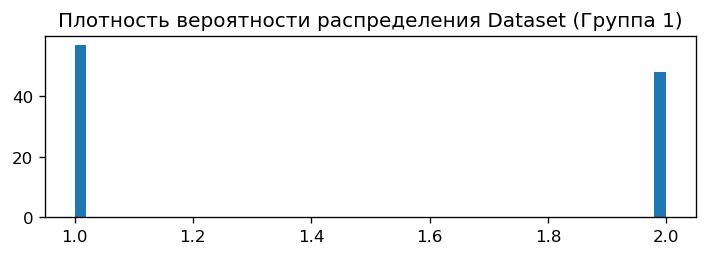

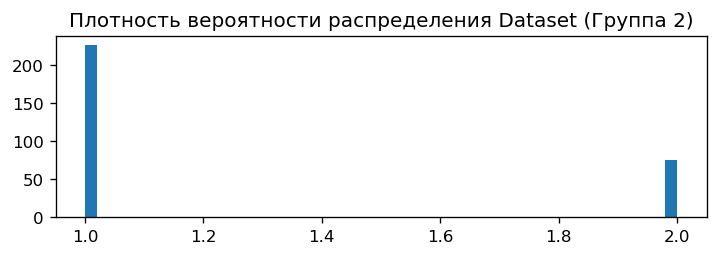

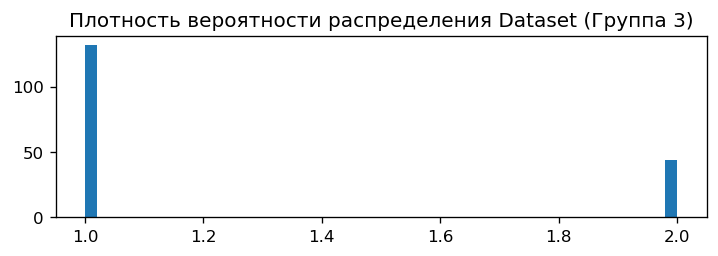

In [14]:
group1 = data[(data['Age']>=1) & (data['Age']<30)]
group2 = data[(data['Age']>=30) & (data['Age']<55)]
group3 = data[data['Age']>=55]
print(f'Выборка 1:\t{len(group1)}\nВыборка 2:\t{len(group2)}\nВыборка 3:\t{len(group3)}\n')

statistic, pvalue = stats.f_oneway(group1['Dataset'], group2['Dataset'], group3['Dataset'])
print(f't-критерий равен:\t\t\t{round(statistic,5)}\nЗначение p равно:\t\t\t{round(pvalue,5)}')

plt.figure(figsize=(7,2), dpi= 120)
plt.hist(group1['Dataset'], bins=50)
plt.title('Плотность вероятности распределения Dataset (Группа 1)')
plt.show()

plt.figure(figsize=(7,2), dpi= 120)
plt.hist(group2['Dataset'], bins=50)
plt.title('Плотность вероятности распределения Dataset (Группа 2)')
plt.show()

plt.figure(figsize=(7,2), dpi= 120)
plt.hist(group3['Dataset'], bins=50)
plt.title('Плотность вероятности распределения Dataset (Группа 3)')
plt.show()

#### Ответ:
Выборки между собой не похожи: t-критерий больше табличного значения, а p-value меньше стандартной альфа ошибки = 0,05.